In [1]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon
import numpy as np
import pandana 

In [2]:
pois = gpd.read_file("/Users/emmastoklundlee/Documents/Social Data Science - Masters/Semester Four/Geospatial Data Science/GDS_project/dataframes/clean_pois_montreal.geojson")


In [3]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923)


In [4]:
# calculate the centroid of each POI (as there are some multipolygons in the data, we need to calculate the centroid of each polygon)
pois['geometry'] = pois['geometry'].centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_2360/1972228854.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois['geometry'] = pois['geometry'].centroid


In [5]:
# check crs of the pois
print(pois.crs)   

EPSG:4326


In [6]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923)


In [7]:
polygons = gpd.read_file("/Users/emmastoklundlee/Documents/Social Data Science - Masters/Semester Four/Geospatial Data Science/GDS_project/dataframes/district_polygons.geojson")

In [8]:
# check crs of the polygons
print(polygons.crs)

EPSG:4326


In [9]:
# calculate the centroid of each polygon of neighborhoods
polygons['centroids'] = polygons['geometry'].centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_2360/3341021584.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons['centroids'] = polygons['geometry'].centroid


In [10]:
# create new centroids GeoDataFrame where geometry is the centroid column
centroids = gpd.GeoDataFrame(polygons, geometry='centroids')

# drop geometry column and rename the centroids column to geometry
centroids = centroids.drop(columns='geometry').rename(columns={'centroids': 'geometry'})

In [11]:
# set column named geometry as the active geometry column
centroids = gpd.GeoDataFrame(centroids, geometry='geometry')

In [12]:
centroids.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:

# Assuming `amenities_gdf` is your GeoDataFrame containing amenities with points
# Assuming `neighbourhoods_gdf` is your GeoDataFrame containing neighborhoods with polygons

# Perform spatial join
amenities_with_neighborhood = gpd.sjoin(pois, polygons, how="left", op="within")

# Now `amenities_with_neighborhood` contains a new column 'neighbourhood' 
# which indicates the neighborhood each amenity point falls within


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [14]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,centroids
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)


In [15]:
amenities_with_neighborhood['Arrondissement'].value_counts()

Arrondissement
Ville-Marie                                            1551
Le Plateau-Mont-Royal                                   921
Côte-des-Neiges–Notre-Dame-de-Grâce                     827
Rosemont–La Petite-Patrie                               781
Villeray–Saint-Michel–Parc-Extension                    466
Ahuntsic-Cartierville                                   432
Le Sud-Ouest                                            390
Mercier–Hochelaga-Maisonneuve                           389
Verdun                                                  277
Saint-Laurent                                           248
L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Roxboro     190
LaSalle                                                 173
Saint-Léonard                                           151
Rivière-des-Prairies–Pointe-aux-Trembles                119
Outremont                                               116
Lachine                                                 109
Montréal-Nord            

In [16]:

# calculate the distance between each amenity and the centroid of the neighborhood it falls within
# first, we need to create a GeoDataFrame from the centroids
# polygons = polygons.set_index('Arrondissement')
# amenities_with_neighborhood['Arrondissement'] = amenities_with_neighborhood['Arrondissement'].astype(str)
# polygons['Arrondissement'] = polygons['Arrondissement'].astype(str)

# join the centroids to the amenities
# amenities_with_neighborhood = amenities_with_neighborhood.join(polygons, on='Arrondissement', rsuffix='_centroid')

# calculate the distance between each amenity and the centroid of the neighborhood it falls within
amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)

# Now `amenities_with_neighborhood` contains a new column 'distance_to_centroid'
# which indicates the distance between each amenity and the centroid of the neighborhood it falls within

# Now you can filter the amenities based on the distance to the centroid
# For example, to get all amenities within 500 meters of the centroid
# amenities_within_500m = amenities_with_neighborhood[amenities_with_neighborhood['distance_to_centroid'] <= 500]






/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_2360/2634055832.py:11: UserWarning: The indices of the two GeoSeries are different.
  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_2360/2634055832.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)


In [17]:
amenities_with_neighborhood.centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_2360/667464992.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood.centroid


0       POINT (-73.66345 45.54186)
1       POINT (-73.66300 45.54201)
2       POINT (-73.67232 45.54761)
3       POINT (-73.67179 45.54839)
4       POINT (-73.67196 45.54923)
                   ...            
7278    POINT (-73.59239 45.43413)
7279    POINT (-73.59732 45.43048)
7280    POINT (-73.64404 45.46111)
7281    POINT (-73.62281 45.50163)
7282    POINT (-73.62500 45.50306)
Length: 7283, dtype: geometry

In [18]:
amenities_with_neighborhood.geometry

0       POINT (-73.66345 45.54186)
1       POINT (-73.66300 45.54201)
2       POINT (-73.67232 45.54761)
3       POINT (-73.67179 45.54839)
4       POINT (-73.67196 45.54923)
                   ...            
7278    POINT (-73.59239 45.43413)
7279    POINT (-73.59732 45.43048)
7280    POINT (-73.64404 45.46111)
7281    POINT (-73.62281 45.50163)
7282    POINT (-73.62500 45.50306)
Name: geometry, Length: 7283, dtype: geometry

In [19]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,centroids,distance_to_centroid
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.000000
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.091483
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.044636
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.091192
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.107767


In [20]:
amenities_with_neighborhood['distance_to_centroid'].describe()

count    18.000000
mean      0.066927
std       0.037825
min       0.000000
25%       0.045595
50%       0.070577
75%       0.091411
max       0.132553
Name: distance_to_centroid, dtype: float64

In [21]:
polygons_centroids = amenities_with_neighborhood[['Arrondissement','centroids']].copy()

amenities_with_neighborhood.drop(columns=['centroids'], inplace=True)

amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons_centroids.centroids)

amenities_with_neighborhood['distance_in_m'] = amenities_with_neighborhood['distance_to_centroid']*111195

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_2360/3535840443.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons_centroids.centroids)


In [22]:
len(polygons_centroids)

7283

In [23]:
len(amenities_with_neighborhood)

7283

In [24]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,distance_to_centroid,distance_in_m
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,0.014123,1570.383871
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,0.014546,1617.422492
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,0.006091,677.287252
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,0.006973,775.388307
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,0.007381,820.760929


In [25]:
# create a function to return the shortest distance for each category within each neighborhood
def shortest_distance(df):
    return df.loc[df['distance_to_centroid'].idxmin()]


In [26]:
# following is taken from exercise 10 solutions 

# TRY GETTING THIS TO WORK FOR US

In [27]:
place = 'Montreal, Canada'
G_walk = ox.graph_from_place(place, network_type='walk')

In [28]:
place = 'Anjou, Montreal, Canada'
G_walk_anjou = ox.graph_from_place(place, network_type='walk')

In [29]:
# specify parameters for the analysis
walk_time = 15  # max walking horizon in minutes
walk_speed = 5  # km per hour
walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx


In [30]:
# set a uniform walking speed on every edge
for u, v, data in G_walk_anjou.edges(data=True):
    data['speed_kph'] = walk_speed
G_walk_anjou = ox.add_edge_travel_times(G_walk_anjou) # this computes the travel time in seconds based on the 'speed_kph' column

In [31]:
# set a uniform walking speed on every edge
for u, v, data in G_walk.edges(data=True):
    data['speed_kph'] = walk_speed
G_walk = ox.add_edge_travel_times(G_walk) # this computes the travel time in seconds based on the 'speed_kph' column

In [32]:
# Get all the "fresh food" stores on OSM within the study site
tags = {'amenity': ['restaurant', 'cafe']}


amenities = ox.features_from_place(place, tags=tags)

amenities = amenities.to_crs('EPSG:25832')

amenities.shape

(10, 22)

In [33]:
amenities.head(25)

addr:city addr:housenumber  \
element_type osmid                                   
node         2427396844  Montréal             8790   
             2496131056       NaN             7100   
             2496360533       NaN             7999   
             2496360540       NaN             7275   
             2496360543       NaN             7225   
             2496360545       NaN             7265   
             2496360560       NaN             7999   
             2496360564       NaN             7999   
             2934341844       NaN              NaN   
             3458612021     Anjou             7150   

                                            addr:street     amenity  \
element_type osmid                                                    
node         2427396844         Boulevard Métropolitain        cafe   
             2496131056              Rue Jean Talon Est        cafe   
             2496360533  Boulevard des Galeries d'Anjou        cafe   
             2496360540  Boulevard des Galeries d'Anjou  restaurant   
             2496360543  Boulevard des Galeries d'Anjou  restaurant   
             2496360545  Boulevard des Galeries d'Anjou  restaurant   
             2496360560  Boulevard des Galeries d'Anjou        cafe   
             2496360564  Boulevard des Galeries d'Anjou  restaurant   
             2934341844                             NaN        cafe   
             3458612021                   Rue Jarry Est        cafe   

                                               cuisine internet_access  \
element_type osmid                                                       
node         2427396844           coffee_shop;sandwich             yes   
             2496131056                            NaN            wlan   
             2496360533  coffee_shop;cake;bagel;bistro            wlan   
             2496360540                            NaN            wlan   
             2496360543           burger;pizza;seafood            wlan   
             2496360545                            NaN            wlan   
             2496360560                    coffee_shop            wlan   
             2496360564                            NaN            wlan   
             2934341844                    coffee_shop             NaN   
             3458612021                    coffee_shop             NaN   

                                                  name             source  \
element_type osmid                                                          
node         2427396844                        cafe QG  NRCan-CanVec-10.0   
             2496131056                    Café Vienne                NaN   
             2496360533                     Café Dépôt                NaN   
             2496360540                     L'Académie                NaN   
             2496360543                      3 Brewers                NaN   
             2496360545  Madisons New York Grill & Bar                NaN   
             2496360560                     Second Cup                NaN   
             2496360564           ZIBO! Restaurant-Bar                NaN   
             2934341844                    Tim Hortons                NaN   
             3458612021                    Tim Hortons                NaN   

                                                 geometry addr:postcode  ...  \
element_type osmid                                                       ...   
node         2427396844  POINT (-4956120.289 9193675.372)           NaN  ...   
             2496131056  POINT (-4959097.863 9194576.161)       H1M 3S3  ...   
             2496360533  POINT (-4958390.663 9194200.375)       H1M 1W6  ...   
             2496360540  POINT (-4959026.580 9193741.734)       H1M 2W2  ...   
             2496360543  POINT (-4959042.706 9193580.492)       H1M 2W2  ...   
             2496360545  POINT (-4959036.366 9193685.692)       H1M 2W2  ...   
             2496360560  POINT (-4958400.297 9194181.399)       H1M 

In [34]:
# list the column names of amenities
amenities.columns

Index(['addr:city', 'addr:housenumber', 'addr:street', 'amenity', 'cuisine',
       'internet_access', 'name', 'source', 'geometry', 'addr:postcode',
       'addr:province', 'addr:suburb', 'internet_access:fee', 'phone',
       'website', 'brand', 'brand:wikidata', 'takeaway',
       'internet_access:operator', 'brand:wikipedia', 'name:fr',
       'official_name'],
      dtype='object')

In [35]:
# pois.to_crs('EPSG:25832', inplace=True)

In [36]:
# pois.head()

In [37]:
# construct the pandana network
# For this we first need the nodes and edges as geodataframes

G_walk = ox.project_graph(G_walk, to_crs='EPSG:25832')

nodes = ox.graph_to_gdfs(G_walk, edges=False)[['x', 'y']]
edges = ox.graph_to_gdfs(G_walk, nodes=False).reset_index()[['u', 'v', 'travel_time']]

network = pandana.Network(node_x=nodes['x'],
                          node_y=nodes['y'], 
                          edge_from=edges['u'],
                          edge_to=edges['v'],
                          edge_weights=edges[['travel_time']])

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 146028
Setting CH edge vector of size 469352
Range graph removed 474478 edges of 938704
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [38]:
G_walk_anjou = ox.project_graph(G_walk_anjou, to_crs='EPSG:25832')

nodes = ox.graph_to_gdfs(G_walk_anjou, edges=False)[['x', 'y']]
edges = ox.graph_to_gdfs(G_walk_anjou, nodes=False).reset_index()[['u', 'v', 'travel_time']]

network = pandana.Network(node_x=nodes['x'],
                          node_y=nodes['y'], 
                          edge_from=edges['u'],
                          edge_to=edges['v'],
                          edge_weights=edges[['travel_time']])



Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

In [39]:
# Some amenities might be polygons, but we need them as points, so let's extract the centroids from the amenities' geometries
centroids = amenities.centroid

# set the amenities' locations on the network 
network.set_pois(category='restaurant',
                 maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
                 maxitems=3,
                 x_col=centroids.x, 
                 y_col=centroids.y)

In [40]:
network

In [41]:
# Some amenities might be polygons, but we need them as points, so let's extract the centroids from the amenities' geometries
# centroids = amenities.centroid

# # set the amenities' locations on the network 
# network.set_pois(category=pois['Restaurant/cafe'],
#                  maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
#                  maxitems=3,
#                  x_col=centroids.x, 
#                  y_col=centroids.y)


In [42]:
# calculate travel time to nearest 3 amenities from each node in network
distances = network.nearest_pois(distance=walk_time_sec,
                                 category='restaurant',
                                 num_pois=3)
distances.astype(int).head()

,1,2,3
osmid,,,
224886238,900,900,900
596644170,900,900,900
4502353385,900,900,900
224911443,900,900,900
8875463868,900,900,900


The `distances` dataframe contains the osmid of each node and the distance in seconds to the three closest amenities (based on our provided walking speed).

OSMnx works with travel distances in seconds, but let's convert it to minutes for a more meaningful value:

In [43]:
distances['travel_time'] = distances[1] / 60

In [44]:
distances

,1,2,3,travel_time
osmid,,,,
224886238,900.000000,900.000000,900.000000,15.000000
596644170,900.000000,900.000000,900.000000,15.000000
4502353385,900.000000,900.000000,900.000000,15.000000
224911443,900.000000,900.000000,900.000000,15.000000
8875463868,900.000000,900.000000,900.000000,15.000000
...,...,...,...,...
11662037419,332.100006,344.700012,385.700012,5.535000
11662037462,413.899994,426.500000,467.500000,6.898333
11662037420,311.000000,323.600006,364.600006,5.183333


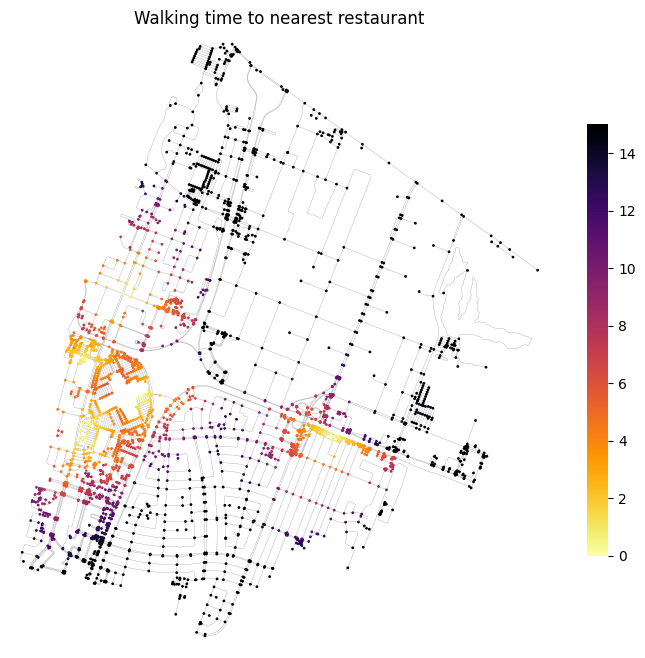

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot distance to nearest amenity from each node
ox.plot_graph(G_walk_anjou, ax=ax, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False)

sc = ax.scatter(x=nodes['x'],
                y=nodes['y'], 
                c=distances['travel_time'], # column to plot (distance to nearest store)
                s=1, # size
                cmap='inferno_r')

ax.set_title('Walking time to nearest restaurant')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')


In [69]:
import plotly.graph_objects as go

# Create scatter plot
fig = go.Figure(data=go.Scatter(
    x=nodes['x'],
    y=nodes['y'],
    mode='markers',
    marker=dict(
        size=10,
        color=distances['travel_time'], # color scale based on distance to nearest store
        colorscale='inferno_r', # colormap
        colorbar=dict(title='Walking time to nearest culture')
    )
))

# Set layout
fig.update_layout(
    title='Walking time to nearest culture',
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude'),
    geo=dict(
        projection=dict(type='mercator'), # specify projection
        center=dict(lon=0, lat=0), # set the center of the map
        scope='north america', # set the scope of the map
        showland=True, # display landmasses
        landcolor='rgb(217, 217, 217)', # set land color
    )
)

# Show plot
fig.show()


In [65]:
import plotly.graph_objects as go

# Create scatter plot with mapbox
fig = go.Figure(data=go.Scattermapbox(
    lat=nodes['y'],
    lon=nodes['x'],
    mode='markers',
    marker=dict(
        size=10,
        color=distances['travel_time'], # color scale based on distance to nearest store
        colorscale='inferno_r', # colormap
        colorbar=dict(title='Walking time to nearest culture')
    )
))

# Set layout with mapbox style, center coordinates, and zoom level
fig.update_layout(
    title='Walking time to nearest culture',
    mapbox=dict(
        style='open-street-map', # specify mapbox style
        center=dict(lon=-73.561668, lat=45.508888), # set the center of the map to Montreal
        zoom=10 # set the zoom level to 10
    ),
    showlegend=False
)

# Show plot
fig.show()



In [61]:
import plotly.graph_objects as go

# Set your Mapbox access token
mapbox_access_token = 'pk.eyJ1IjoiZW1tYXN0b2tsZWUiLCJhIjoiY2x2bnJ4YW1zMGNycTJsbjFlMTNyeTRmdCJ9.N8vvm8Lr-aL4EmYa4eoz8A'

# Create scatter plot with mapbox
fig = go.Figure(go.Scattermapbox(
    lat=nodes['y'],
    lon=nodes['x'],
    mode='markers',
    marker=dict(
        size=10,
        color=distances['travel_time'], # color scale based on distance to nearest store
        colorscale='inferno_r', # colormap
        colorbar=dict(title='Walking time to nearest culture')
    )
))

# Set layout with mapbox style, center coordinates, and zoom level
fig.update_layout(
    title='Walking time to nearest culture',
    mapbox=dict(
        accesstoken=mapbox_access_token, # set your Mapbox access token
        style='mapbox://styles/mapbox/streets-v1', # specify the mapbox style
        center=dict(lon=nodes['x'].mean(), lat=nodes['y'].mean()), # set the center of the map to the mean of the data
        zoom=10 # set the zoom level to 10
    ),
    showlegend=False
)

# Show plot
fig.show()



In [63]:
import plotly.graph_objects as go

# Create scatter plot with mapbox
fig = go.Figure(go.Scattermapbox(
    lat=nodes['y'],
    lon=nodes['x'],
    mode='markers',
    marker=dict(
        size=10,
        color=distances['travel_time'], # color scale based on distance to nearest store
        colorscale='inferno_r', # colormap
        colorbar=dict(title='Walking time to nearest culture')
    )
))

# Set layout with mapbox style, center coordinates, and zoom level
fig.update_layout(
    title='Walking time to nearest culture',
    mapbox=dict(
        accesstoken=mapbox_access_token, # set your Mapbox access token
        style='open-street-map', # specify the mapbox style
        center=dict(lon=nodes['x'].mean(), lat=nodes['y'].mean()), # set the center of the map to the mean of the data
        zoom=10 # set the zoom level to 10
    ),
    showlegend=False
)

# Show plot
fig.show()


In [47]:

# set the amenities' locations on the network 
network.set_pois(category='Health care',
                 maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
                 maxitems=3,
                 x_col=centroids.x, 
                 y_col=centroids.y)

In [48]:
# calculate travel time to nearest 3 amenities from each node in network
distances = network.nearest_pois(distance=walk_time_sec,
                                 category='Health care',
                                 num_pois=3)
distances.astype(int).head()

,1,2,3
osmid,,,
224886238,900,900,900
596644170,900,900,900
4502353385,900,900,900
224911443,900,900,900
8875463868,900,900,900


In [49]:
distances['travel_time'] = distances[1] / 60

In [50]:
distances

,1,2,3,travel_time
osmid,,,,
224886238,900.000000,900.000000,900.000000,15.000000
596644170,900.000000,900.000000,900.000000,15.000000
4502353385,900.000000,900.000000,900.000000,15.000000
224911443,900.000000,900.000000,900.000000,15.000000
8875463868,900.000000,900.000000,900.000000,15.000000
...,...,...,...,...
11662037419,332.100006,344.700012,385.700012,5.535000
11662037462,413.899994,426.500000,467.500000,6.898333
11662037420,311.000000,323.600006,364.600006,5.183333


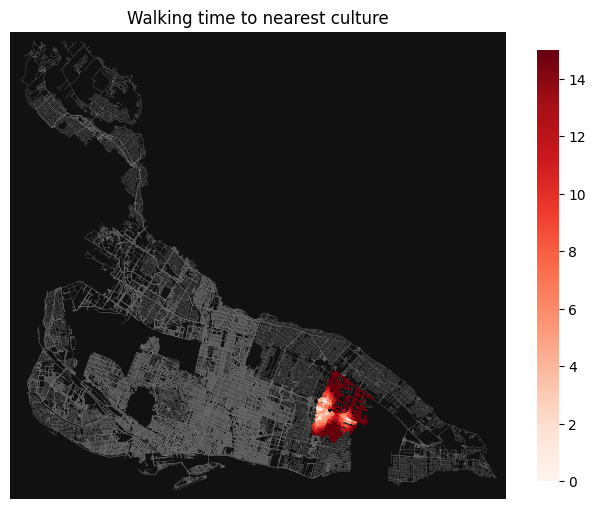

In [51]:
# Plot distance to nearest amenity from each node
fig, ax = ox.plot_graph(G_walk, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False)

sc = ax.scatter(x=nodes['x'],
                y=nodes['y'], 
                c=distances['travel_time'], # column to plot (distance to nearest store)
                s=1, # size
                cmap='Reds')

ax.set_title('Walking time to nearest culture')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')